# Лабораторная работа 2.2
**Тема.** Функциональные ряды. Степенные ряды
<br>
**Цель.** Научиться находить область сходимости функциональных рядов, определять тип их сходимости, раскладывать функции в степенные ряды и контролировать результаты с помощью средств системы Maple (SageMath).

## **Задание 1.** Найдите область сходимости функционального ряда, постройте график его суммы и сравните с полученным результатом.

In [1]:
n = var('n')
x = var('x')
a = ((n + 1) / (2 * n)) * (1 / (x^2 - 4 * x + 5)^n)
show(a)

1/2*(n + 1)/((x^2 - 4*x + 5)^n*n)

По признаку Даламбера ряд сходится, если сходится $ \frac{a_{n+1}}{a_{n}} $ 

In [2]:
a_dalamber = simplify(a.subs(n=n+1) / a)
show(a_dalamber)

(n + 2)*n/((x^2 - 4*x + 5)*(n + 1)^2)

Найдем предел для данного выражения

In [3]:
a_limit = limit(a_dalamber, n=oo)
show(a_limit)

1/(x^2 - 4*x + 5)

Иначе говоря, функциональный ряд сходится при $ \frac{1}{x^2 - 4x + 5} < 1 $

In [4]:
roots = solve(a_limit < 1, x)
show(roots)

[[x < 2], [x > 2]]

Полученные результаты позволяют сказать, что ряд сходится при $ x \ne 2 $. Для подтверждения найдем сумму ряда.

In [5]:
S = sum(a, n, 1, oo)
show(S)

-1/2*((x^2 - 4*x + 4)*log((x^2 - 4*x + 4)/(x^2 - 4*x + 5)) - 1)/(x^2 - 4*x + 4)

Построим график суммы.

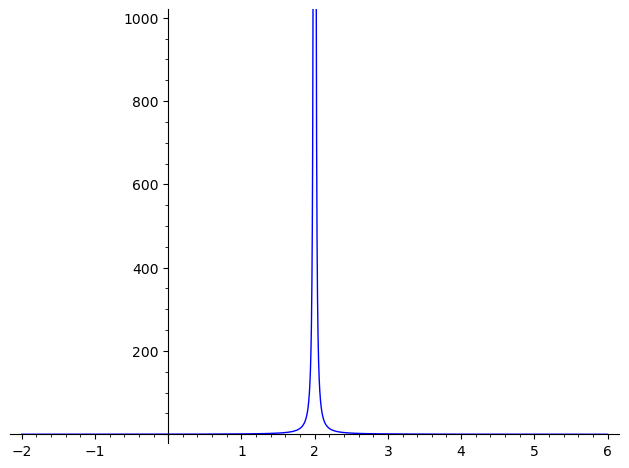

In [6]:
f(x) = S
plot(f, (x, -2, 6), ymin=-2, ymax=1000)

## **Задание 2.** Докажите равномерную сходимость функционального ряда на отрезке [0,1].

Для контроля результата выполните расчеты в системе Maple (Sage) и найдите наименьшее значение $ n_{min} $, при котором $ |r_{n_{min}}(x)| < 0.1 \forall x \in [0,1] $. Убедитесь, что график частичной суммы $ S_{n_{min}} $ ряда не выходит на отрезке [0,1] за пределы 0,2-полосы, центрированной относительно графика суммы ряда.

In [7]:
n = var('n')
x = var('x')
a = (-1) ^ n * (x^n/(5 * n - 6))
show(a)

(-1)^n*x^n/(5*n - 6)

Ряд знакочередующийся, значит проверим его по признаку Лейбница. Проверим монотонность убывания функции.

In [8]:
a_variants_x = [a.subs(x=x) for x in range(0, 2)]
checks = [abs(a_variant(n=k)) >= abs(a_variant(n=k+1)) for k in range(1, 500) for a_variant in a_variants_x]

show(all(checks))

True

Проверим предел

In [9]:
checks = [round(limit(a_variant(n=n), n=oo), 5) == 0 for a_variant in a_variants_x]

show(all(checks))

True

По критерию Лейбница на отрезке $ [0, 1] $ ряд сходится. Найдем $ n_{min} $, при котором остаток частичной суммы $ |r_{n_{min}}(x)| < 0.1 \forall x \in [0,1] $.

In [10]:
n_min = 1

while not all(abs(sum(a_variant(n=k) for k in range(n_min + 1, 100))) < 0.1 for a_variant in a_variants_x):
    n_min += 1

show(n_min)

2

Построим график частичной суммы для $ x = 1 $

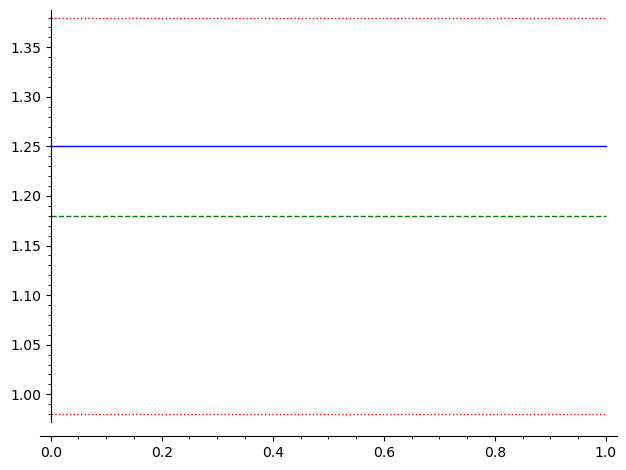

In [11]:
S_partial = sum(a_variants_x[1].subs(n=k) for k in range(1, n_min+1))
S_true = sum(a_variants_x[1].subs(n=k) for k in range(1, 100))

p1 = plot(S_partial.subs(x=x), (x,0,1), color='blue')
p2 = plot(S_true.subs(x=x), (x,0,1), color='green', linestyle='--')
p_band_top = plot(S_true.subs(x=x) + 0.2, (x,0,1), color='red', linestyle=':')
p_band_bot = plot(S_true.subs(x=x) - 0.2, (x,0,1), color='red', linestyle=':')

show(p1 + p2 + p_band_top + p_band_bot, legend_loc='upper left')

## **Задание 3.** Вычислите интеграл с точностью до 0,001

В системе `SageMath` вычисление определенных интегралов происходит с помощью функции `integral`. Например, код
```python
integral(x^2, x, 0, 1)
```
эквивалентен
$$
 \int_{0}^{1} x^2 \,dx
$$
С ее же помощью можно вычислять неопределенные интегралы, для этого просто не указываем область определения:
```python
integral(x^2, x, 0, 1)
```

Однако для этого задания данная функция не подходит. Интеграл из условия не имеет элементарного аналитического выражения, но его можно точно вычислить численно с заданной точностью. 

Используем функцию `numerical_integral`, которая принимает на вход лямбду и область определения. По умолчанию функция использует [Метод Монте Карло](https://en.wikipedia.org/wiki/Monte_Carlo_method) для нахождения численного значения интеграла. На выходе имеем само значение и оценку ошибки.

In [12]:
var('x')

result = numerical_integral(lambda x: sin(3*x^2), 0, 0.1)[0]

Округлим результат до нужного значения

In [13]:
show(round(result, 4))

0.001